In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [4]:
# Partie A - Les données
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Téléchargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] # N = 60 000 données
# Données d'apprentissage X
X_train = np.reshape(X_train_data,(N,784)) # vecteur image
X_train = X_train/255 # normalisation
# Données d'apprentissage Y vers une liste de taille 10
Y_train = to_categorical(Y_train_data, num_classes=10)
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)

In [5]:
### Partie B - Le réseau de neurones
p = 8
modele = Sequential()

# Première couche : p neurones (entrée de dimension 784 = 28x28)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))
# Deuxième couche : p neurones
modele.add(Dense(p, activation='sigmoid'))
# Couche de sortie : 1O neurones (un par chiffre)
modele.add(Dense(10, activation='softmax'))
# Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
### Partie C - Calcul des poids par descente de gradient
modele.fit(X_train, Y_train, batch_size=32, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 19s 4ms/step - loss: 2.2761 - accuracy: 0.2229
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1476 - accuracy: 0.4141
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9129 - accuracy: 0.4629
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6532 - accuracy: 0.5198
Epoch 5/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4538 - accuracy: 0.5761
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3080 - accuracy: 0.6179
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1919 - accuracy: 0.6472
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0944 - accuracy: 0.6777
Epoch 9/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0135 - accuracy: 0.7064
Epoch 10/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.94

In [7]:
### Partie D - Résultats
resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Valeur de lerreur sur les données de test (loss): 0.4174882769584656
Précision sur les données de test (accuracy): 0.8870999813079834


## PREDICTION

In [8]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

313/313 [==============================] - 16s 3ms/step


Sortie réseau [1.02962824e-02 7.25108202e-06 8.21973849e-03 5.70882461e-04
 5.43601513e-01 1.16118649e-02 3.97112131e-01 1.04031766e-04
 8.82781576e-03 1.96484774e-02]
Chiffre attendu : 5
Chiffre prédit : 4


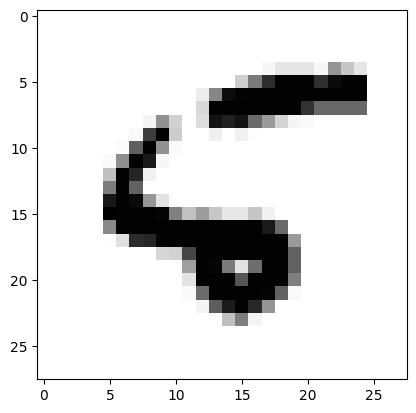

In [9]:
# Un exemple
i = 8 # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()

## PROGRAMME

In [10]:
# Partie A. Données
# Fonction à approcher
def f(x):
    return np.cos(2*x) + x*np.sin(3*x) + x**0.5 - 2
a, b = 0, 5 # intervalle [a,b]
N = 100 # taille des données
X = np.linspace(a, b, N) # abscisses
Y = f(X) # ordonnées
X_train = X.reshape(-1,1)
Y_train = Y.reshape(-1,1)

In [11]:
# Partie B. Réseau
modele = Sequential()
p = 10
modele.add(Dense(p, input_dim=1, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(p, activation='tanh'))
modele.add(Dense(1, activation='linear'))
#

In [12]:
# Méthode de gradient : descente de gradient classique améliorée
mysgd = optimizers.legacy.SGD(lr=0.001, decay=1e-7, momentum=0.9, nesterov=True) # J'ai ajouter legacy
modele.compile(loss='mean_squared_error', optimizer=mysgd)
print(modele.summary())

c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# # Partie C. Apprentissage
history = modele.fit(X_train, Y_train, epochs=20, batch_size=N)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 5.0415
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 5.0123
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 4.9742
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 4.9319
Epoch 5/20
1/1 [==============================] - 0s 18ms/step - loss: 4.8895
Epoch 6/20
1/1 [==============================] - 0s 40ms/step - loss: 4.8505
Epoch 7/20
1/1 [==============================] - 0s 15ms/step - loss: 4.8171
Epoch 8/20
1/1 [==============================] - 0s 14ms/step - loss: 4.7903
Epoch 9/20
1/1 [==============================] - 0s 24ms/step - loss: 4.7693
Epoch 10/20
1/1 [==============================] - 0s 41ms/step - loss: 4.7527
Epoch 11/20
1/1 [==============================] - 0s 24ms/step - loss: 4.7385
Epoch 12/20
1/1 [==============================] - 0s 14ms/step - loss: 4.7250
Epoch 13/20
1/1 [==============================] - 0s 16ms/step

4/4 [==============================] - 0s 3ms/step


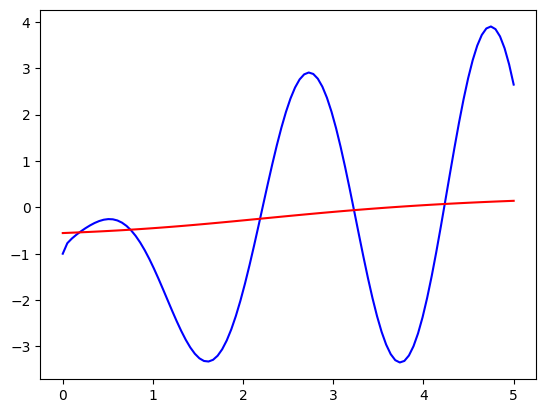

In [14]:
# Partie D. Visualisation
# Affichage de la fonction et de son approximation
Y_predict = modele.predict(X_train)
plt.plot(X_train, Y_train, color='blue')
plt.plot(X_train, Y_predict, color='red')
plt.show()

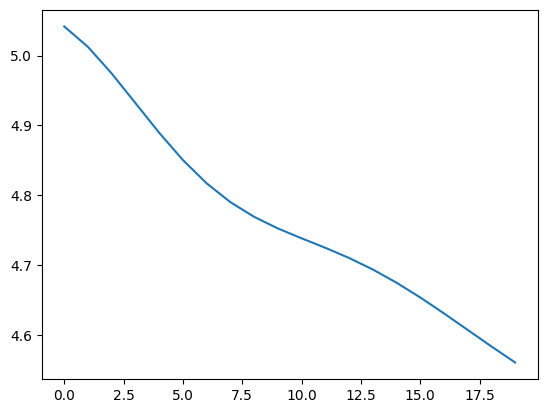

In [15]:
# Affichage de l'erreur au fil des époques
plt.plot(history.history['loss'])
plt.show()